In [121]:
import numpy as np
import math

# initial distribution
#please insert the parameter specific to this distribution
def fdistrib(t,typ):
    if typ == "gauss":
        mu = 0
        sigma = 1
        if t != 0:
            fdistrib = np.exp(complex(0,t*mu)-(1/2)*t**2*sigma**2)
        else:
            fdistrib = 1
            
    elif typ == "chi":
        n=2
        fdistrib = 1/(1-complex(0,2*t))**(n/2)
        
    elif typ == "uniform":
        a = 2
        b = 5
        if t != 0:
            fdistrib = (np.exp(complex(0,t*b))-np.exp(complex(0,t*a)))/(complex(0,t*(b-a)))
        else:
            fdistrib = 0
            
    elif typ == "heaveside":
        a = 2
        fdistrib = np.exp(complex(0,t*a))
        
    elif typ == "triangle":
        if t != 0:
            fdistrib = (math.sin(t/2)/(t/2))**2
        else:
            fdistrib = 1
    else:
        print("wrong type")
        fdistrib = 1
        
    return fdistrib

# Fourier coefficient
def Fk(b,a,k,typ):
    Fk = (2/(b-a))*np.real(fdistrib(k*np.pi/(b-a),typ)*np.exp(complex(0,-k*a*np.pi/(b-a))))
    
    return(Fk)

#fourier series
def f(N,b,a,x,typ):
    f = 0 
    theta = (x-a)*np.pi/(b-a)
    for k in range(N):
        if k == 0 :
            #add the half coeff when k=0
            f = f+(1/2)*Fk(b,a,k,typ)*math.cos(k*theta)
        else:
            f = f+Fk(b,a,k,typ)*math.cos(k*theta)
    return f




# parameters 
x = np.arange(-5,5,0.1)
N = 100
a = -3
b = 3

# get the distribution 
F = list()
for i in range(len(x)):
    F.append(f(N,b,a,x[i],"chi"))

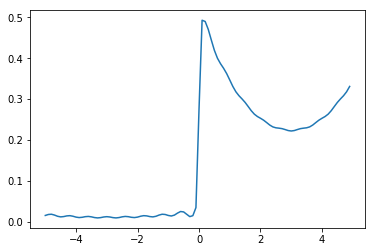

In [122]:
plt.plot(x,F)
plt.show()